Exploratory Data Analysis (EDA)
#https://data.world/dataquest/mlb-game-logs/workspace/file?filename=game_logs.csv

In [344]:
#import the useful libraries.
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [345]:
#import the useful libraries.
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(10,6)})

In [346]:
#read the file
#https://data.world/dataquest/mlb-game-logs/workspace/file?filename=game_logs.csv

data = pd.read_csv('game_logs.csv')

In [347]:
#print the head of the data frame
data.head()

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,h_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
0,20050414,0,Thu,ARI,NL,10,WAS,NL,10,5,...,Brian Schneider,2,guzmc001,Cristian Guzman,6,hernl003,Livan Hernandez,1,NaN,Y
1,20050416,0,Sat,ARI,NL,11,WAS,NL,11,9,...,Brian Schneider,2,guzmc001,Cristian Guzman,6,pattj004,John Patterson,1,NaN,Y
2,20050417,0,Sun,ARI,NL,12,WAS,NL,12,7,...,J.J. Davis,7,schnb001,Brian Schneider,2,loaie001,Esteban Loaiza,1,NaN,Y
3,20050418,0,Mon,FLO,NL,13,WAS,NL,13,4,...,J.J. Davis,7,benng001,Gary Bennett,2,ohkat001,Tomo Ohka,1,NaN,Y
4,20050419,0,Tue,FLO,NL,14,WAS,NL,14,3,...,Brian Schneider,2,guzmc001,Cristian Guzman,6,hernl003,Livan Hernandez,1,NaN,Y


In [348]:
#print the head of the data frame
data.tail()

,date,number_of_game,day_of_week,v_name,v_league,v_game_number,h_name,h_league,h_game_number,h_score,...,h_player_7_name,h_player_7_def_pos,h_player_8_id,h_player_8_name,h_player_8_def_pos,h_player_9_id,h_player_9_name,h_player_9_def_pos,additional_info,acquisition_info
965,20160928,0,Wed,ARI,NL,158,WAS,NL,158,0,...,Danny Espinosa,6,lobaj001,Jose Lobaton,2,gonzg003,Gio Gonzalez,1,NaN,Y
966,20160929,0,Thu,ARI,NL,159,WAS,NL,159,5,...,Michael Taylor,9,sevep001,Pedro Severino,2,rossj002,Joe Ross,1,NaN,Y
967,20160930,0,Fri,MIA,NL,159,WAS,NL,160,4,...,Danny Espinosa,6,lobaj001,Jose Lobaton,2,colea002,A.J. Cole,1,NaN,Y
968,20161001,0,Sat,MIA,NL,160,WAS,NL,161,2,...,Pedro Severino,2,espid001,Danny Espinosa,6,roart001,Tanner Roark,1,NaN,Y
969,20161002,0,Sun,MIA,NL,161,WAS,NL,162,10,...,Danny Espinosa,6,lobaj001,Jose Lobaton,2,schem001,Max Scherzer,1,NaN,Y


In [349]:
# Checking the missing values.  There are no missing values ("additional info" column is an optional field that does not impact EDA
data.isnull().sum()

date                    0
number_of_game          0
day_of_week             0
v_name                  0
v_league                0
                     ... 
h_player_9_id           0
h_player_9_name         0
h_player_9_def_pos      0
additional_info       967
acquisition_info        0
Length: 163, dtype: int64

In [350]:
#Let's calculate the percentage of each  team was played
data.v_name.value_counts(normalize=True)

PHI    0.115464
ATL    0.114433
NYN    0.112371
FLO    0.063918
MIA    0.048454
ARI    0.042268
SLN    0.042268
MIL    0.042268
CHN    0.042268
PIT    0.041237
COL    0.041237
CIN    0.040206
SFN    0.039175
SDN    0.037113
LAN    0.037113
BAL    0.030928
HOU    0.029897
TOR    0.009278
DET    0.008247
NYA    0.008247
TBA    0.008247
TEX    0.006186
SEA    0.006186
CHA    0.006186
ANA    0.006186
MIN    0.006186
CLE    0.005155
BOS    0.003093
KCA    0.003093
OAK    0.003093
Name: v_name, dtype: float64

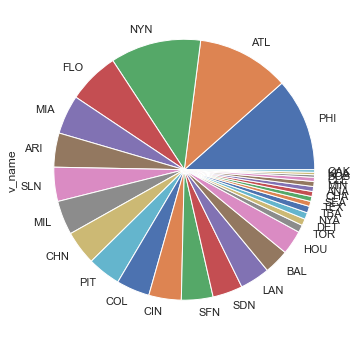

In [351]:
#plot the pie chart of opponents 
data.v_name.value_counts(normalize=True).plot.pie()
plt.show()

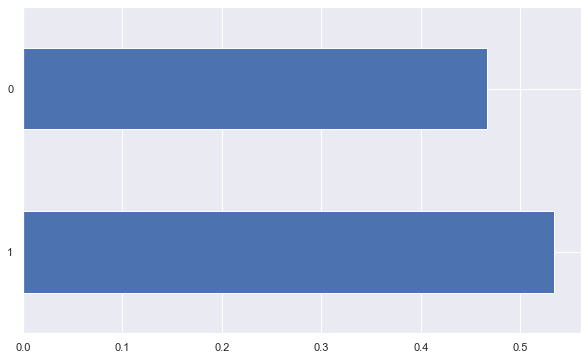

In [352]:
#plot the bar graph of percentage home team wins categories
data.W.value_counts(normalize=True).plot.barh()
plt.show()

In [353]:
data.describe()

,date,number_of_game,v_game_number,h_game_number,h_score,v_score,W,length_outs,day_night,forefeit,...,v_player_9_def_pos,h_player_1_def_pos,h_player_2_def_pos,h_player_3_def_pos,h_player_4_def_pos,h_player_5_def_pos,h_player_6_def_pos,h_player_7_def_pos,h_player_8_def_pos,h_player_9_def_pos
count,9.700000e+02,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,0.0,...,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000,970.000000
mean,2.010570e+07,0.052577,82.914433,82.984536,4.239175,4.222680,0.534021,53.771134,0.338144,NaN,...,1.156701,6.864948,5.690722,6.101031,4.918557,6.085567,5.436082,4.539175,4.310309,1.053608
std,3.456444e+04,0.291465,47.036796,46.897367,2.804705,2.959287,0.499099,5.549030,0.473322,NaN,...,0.974484,1.541751,1.698423,1.951449,2.452977,2.371550,2.329542,2.288079,2.354890,0.561228
min,2.005041e+07,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,30.000000,0.000000,NaN,...,1.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000
25%,2.007327e+07,0.000000,42.250000,42.000000,2.000000,2.000000,0.000000,51.000000,0.000000,NaN,...,1.000000,6.000000,4.000000,5.000000,3.000000,4.000000,3.000000,2.000000,2.000000,1.000000
50%,2.010563e+07,0.000000,83.000000,84.000000,4.000000,4.000000,1.000000,54.000000,0.000000,NaN,...,1.000000,8.000000,6.000000,5.000000,3.000000,7.000000,6.000000,4.000000,4.000000,1.000000
75%,2.013803e+07,0.000000,125.000000,124.000000,6.000000,6.000000,1.000000,54.000000,1.000000,NaN,...,1.000000,8.000000,7.000000,9.000000,7.000000,8.000000,7.000000,6.000000,6.000000,1.000000
max,2.016100e+07,2.000000,162.000000,162.000000,15.000000,18.000000,1.000000,108.000000,1.000000,NaN,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,8.000000


In [354]:
#understand data (attendance feature)
data.attendance.describe()

count      970.000000
mean     28304.762887
std       7498.080044
min          0.000000
25%      22718.250000
50%      28381.000000
75%      33686.000000
max      45596.000000
Name: attendance, dtype: float64

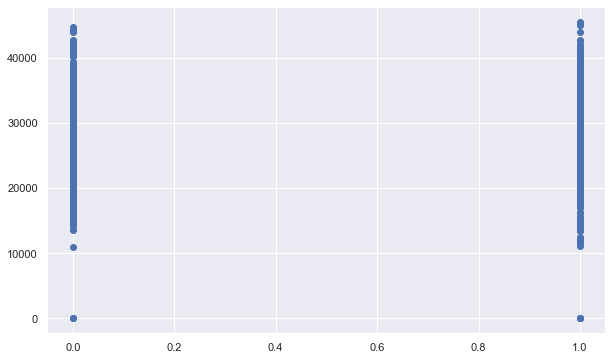

In [355]:
#plot the scatter plot of W (wins) and attendance variable in data.  Overall, the more wins the stronger the attendance.
plt.scatter(data.W,data.attendance)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


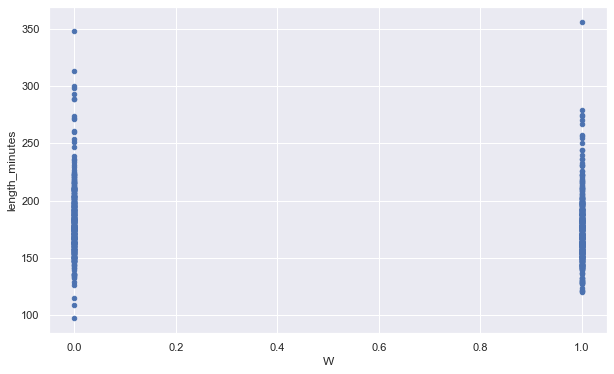

In [356]:
#plot the scatter plot of wins and game length.  Overall longer games equate to a loss

data.plot.scatter(x="W",y="length_minutes")
plt.show()

In [357]:
#understand data (runs)
data.length_minutes.describe()

count    970.000000
mean     177.918557
std       27.879598
min       97.000000
25%      160.000000
50%      175.000000
75%      191.000000
max      356.000000
Name: length_minutes, dtype: float64

In [358]:
#Calculating game time length
data.length_minutes.mean()

177.91855670103092

In [359]:
df = pd.DataFrame(data, columns = ['W', 'length_minutes'])

In [360]:
print(df)

     W  length_minutes
0    1             153
1    1             174
2    1             175
3    0             179
4    0             170
..  ..             ...
965  0             115
966  1             175
967  0             188
968  1             183
969  1             216

[970 rows x 2 columns]


In [361]:
data.shape

(970, 163)

In [362]:
data.describe

<bound method NDFrame.describe of          date  number_of_game day_of_week v_name v_league  v_game_number  \
0    20050414               0         Thu    ARI       NL             10   
1    20050416               0         Sat    ARI       NL             11   
2    20050417               0         Sun    ARI       NL             12   
3    20050418               0         Mon    FLO       NL             13   
4    20050419               0         Tue    FLO       NL             14   
..        ...             ...         ...    ...      ...            ...   
965  20160928               0         Wed    ARI       NL            158   
966  20160929               0         Thu    ARI       NL            159   
967  20160930               0         Fri    MIA       NL            159   
968  20161001               0         Sat    MIA       NL            160   
969  20161002               0         Sun    MIA       NL            161   

    h_name h_league  h_game_number  h_score  ...  h_p

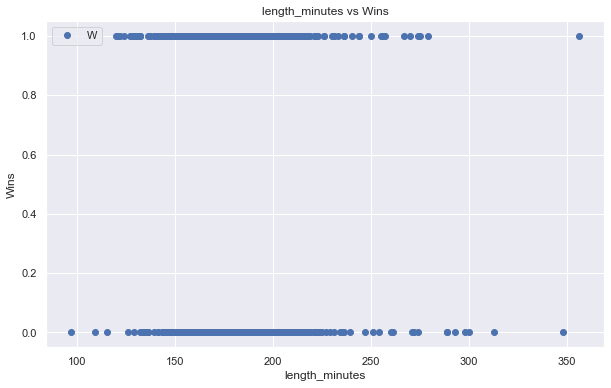

In [363]:
#let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data.

data.plot(x='length_minutes', y='W', style='o')
plt.title('length_minutes vs Wins')
plt.xlabel('length_minutes')
plt.ylabel('Wins')
plt.show()

In [364]:
#To extract the attributes and labels, execute the following script

X = data.length_minutes.values.reshape((-1, 1))
y = data.W.values

In [365]:
print(X)

[[153]
 [174]
 [175]
 [179]
 [170]
 [160]
 [171]
 [187]
 [159]
 [153]
 [161]
 [151]
 [203]
 [182]
 [167]
 [160]
 [171]
 [155]
 [141]
 [178]
 [163]
 [171]
 [176]
 [193]
 [193]
 [208]
 [180]
 [174]
 [174]
 [150]
 [191]
 [174]
 [196]
 [154]
 [160]
 [222]
 [131]
 [179]
 [167]
 [217]
 [144]
 [175]
 [202]
 [188]
 [149]
 [174]
 [147]
 [182]
 [171]
 [251]
 [160]
 [167]
 [160]
 [195]
 [181]
 [134]
 [158]
 [155]
 [207]
 [149]
 [141]
 [179]
 [185]
 [236]
 [164]
 [171]
 [167]
 [204]
 [194]
 [178]
 [135]
 [172]
 [151]
 [158]
 [164]
 [201]
 [144]
 [193]
 [196]
 [192]
 [215]
 [171]
 [149]
 [164]
 [158]
 [181]
 [158]
 [179]
 [165]
 [234]
 [160]
 [163]
 [231]
 [161]
 [183]
 [182]
 [169]
 [199]
 [128]
 [151]
 [179]
 [180]
 [150]
 [170]
 [159]
 [231]
 [173]
 [158]
 [172]
 [167]
 [198]
 [176]
 [197]
 [231]
 [156]
 [166]
 [188]
 [154]
 [148]
 [191]
 [198]
 [244]
 [176]
 [174]
 [204]
 [198]
 [198]
 [157]
 [167]
 [189]
 [147]
 [169]
 [197]
 [200]
 [154]
 [166]
 [179]
 [172]
 [121]
 [170]
 [154]
 [210]
 [141]

In [366]:
#train our algorithm. We have split our data into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [367]:
#train our algorithm (importing library)

from sklearn.linear_model import LinearRegression

In [368]:
#train our algorithm by defining "regressor"

regressor = LinearRegression()

In [369]:
#train our algorithm by creating "fit"
regressor.fit(X_train, y_train)

LinearRegression()

In [370]:
print(regressor.intercept_)

1.0422836387150922


In [371]:
print(regressor.coef_)

[-0.00293081]


In [372]:
#make  predictions.  Use  test data and see how accurately our algorithm predicts the percentage score

y_pred = regressor.predict(X_test)

In [373]:
#To compare the actual output values for X_test with the predicted values

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0,0.022362
1,0,0.461983
2,1,0.552839
3,1,0.491292
4,0,0.453191
...,...,...
189,0,0.532323
190,0,0.602662
191,1,0.629040
192,0,0.520600


In [374]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.49255250358780334
Mean Squared Error: 0.25024475908742766
Root Mean Squared Error: 0.5002446992097245


In [375]:
print(df)

     Actual  Predicted
0         0   0.022362
1         0   0.461983
2         1   0.552839
3         1   0.491292
4         0   0.453191
..      ...        ...
189       0   0.532323
190       0   0.602662
191       1   0.629040
192       0   0.520600
193       1   0.558700

[194 rows x 2 columns]
